In [26]:
#Loading the data set
import pandas as pd
# 'housing.csv' uploaded in Colab directory or Files
df = pd.read_csv('housing.csv')

In [28]:
# Display basic statistics and initial exploration
# To display first 5 rows of the DataFrame
print("First 5 rows of the dataset:")
print(df.head())

# Print a concise summary of the DataFrame, including data types and non-null values
print("\n--- Information about the dataset ---")
print(df.info())

# Generate descriptive statistics of the numerical columns
print("\n--- Descriptive statistics of the dataset ---")
print(df.describe())

First 5 rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

--- Information about the dataset ---
<class 

In [43]:
#Import Necessary Libaraies and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing.csv')

# Define the target variable explicitly
target_variable = 'median_house_value'
print(f"Target Variable for Visualization: {target_variable}\n")

Target Variable for Visualization: median_house_value



--- Correlation Heatmap of Numerical Features and Target Variable ---


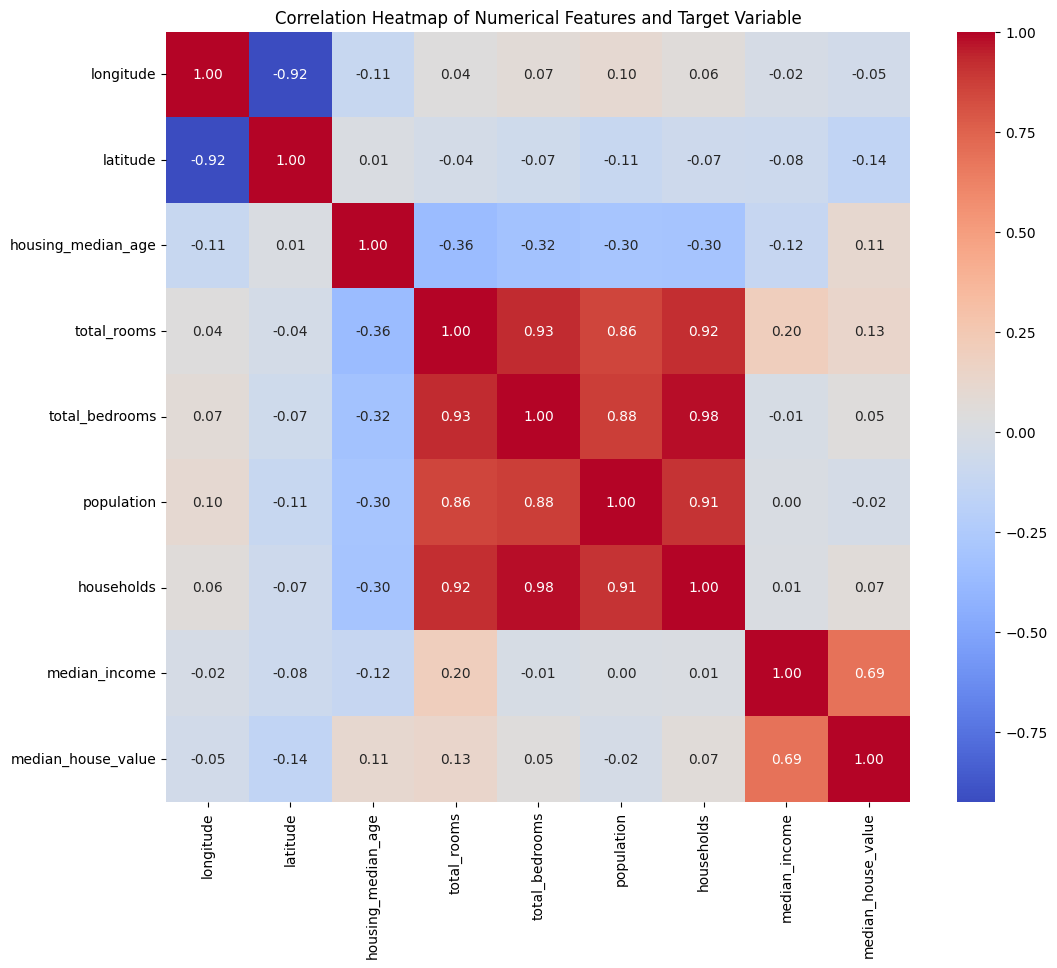


--- Correlations with the target variable (Numerical Features Only) ---
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [44]:
# Visualize Relationship using a Correlation Heatmap
print("--- Correlation Heatmap of Numerical Features and Target Variable ---")
plt.figure(figsize=(12, 10))

# To calculate correlations, ensuring only numerical data is considered
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features and Target Variable')
plt.show()

# To display specific correlations with the target variable
correlations = df.corr(numeric_only=True)[target_variable].sort_values(ascending=False)
print("\n--- Correlations with the target variable (Numerical Features Only) ---")
print(correlations)

In [45]:
# Split the dataset into training and testing sets. Apply Linear Regression using scikit-learn and print the coefficients, intercept, and performance metrics (R² score, MAE, MSE, RMSE).
# Import Necessary Libraries and Load Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#For handling missing values
from sklearn.impute import SimpleImputer

df = pd.read_csv('housing.csv')

# To define the target variable
target_variable = 'median_house_value'
print(f"Target Variable: {target_variable}\n")

Target Variable: median_house_value



In [31]:
#Separating Features and Target, and Split the Dataset
# Separate features (X) and target (y)
X = df.drop(columns=[target_variable])
y = df[target_variable]

print(f"Original shape of features (X): {X.shape}")
print(f"Original shape of target (y): {y.shape}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Original shape of features (X): (20640, 9)
Original shape of target (y): (20640,)

Shape of X_train: (16512, 9)
Shape of X_test: (4128, 9)
Shape of y_train: (16512,)
Shape of y_test: (4128,)


In [46]:
# Define Preprocessing Steps and Build the Model Pipeline
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    # To handle the missing numerical values
    ('imputer', SimpleImputer(strategy='mean')),
    # To scale numerical features
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
     # To handle the missing numerical values
    ('imputer', SimpleImputer(strategy='most_frequent')),
     # For One-Hot encode categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessors using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the full model pipeline: Preprocessing + Linear Regression
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', LinearRegression())])

print("\nPreprocessing and Model Pipeline defined.")


Preprocessing and Model Pipeline defined.


In [47]:
# Training the Model, Getting Coefficients/Intercepts, and Make Predictions
print("\nTraining the Linear Regression model...")
model_pipeline.fit(X_train, y_train)
print("Model training complete.")

# Access the trained Linear Regression model from the pipeline
linear_reg_model = model_pipeline.named_steps['regressor']
# Get feature names after preprocessing for interpretable coefficients
preprocessor_output_features = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Print coefficients and intercept
print("\n--- Linear Regression Coefficients ---")
# Pair feature names with their corresponding coefficients
for feature, coef in zip(preprocessor_output_features, linear_reg_model.coef_):
    print(f"{feature}: {coef:.2f}")

print("\n--- Linear Regression Intercept ---")
print(f"{linear_reg_model.intercept_:.2f}")

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)
print(f"\nFirst 5 predicted values: {[f'{val:.2f}' for val in y_pred[:5]]}")


Training the Linear Regression model...
Model training complete.

--- Linear Regression Coefficients ---
num__longitude: -53826.65
num__latitude: -54415.70
num__housing_median_age: 13889.87
num__total_rooms: -13094.25
num__total_bedrooms: 43068.18
num__population: -43403.43
num__households: 18382.20
num__median_income: 75167.77
cat__ocean_proximity_<1H OCEAN: -18926.58
cat__ocean_proximity_INLAND: -58713.24
cat__ocean_proximity_ISLAND: 117198.49
cat__ocean_proximity_NEAR BAY: -24063.23
cat__ocean_proximity_NEAR OCEAN: -15495.44

--- Linear Regression Intercept ---
238826.36

First 5 predicted values: ['64693.83', '134863.72', '266127.76', '278640.81', '273407.81']


In [48]:
# Calculating and Printing Performance Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print("\n--- Model Performance Metrics ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


--- Model Performance Metrics ---
Mean Absolute Error (MAE): 50702.17
Mean Squared Error (MSE): 4904409297.41
Root Mean Squared Error (RMSE): 70031.49
R-squared (R²): 0.63


In [49]:
# Plot the predicted vs. actual values for the test set. Comment on how well the model performs.
import matplotlib.pyplot as plt

import numpy as np
if 'y_test' not in locals() or 'y_pred' not in locals():
    y_test = np.array([250000, 300000, 200000, 400000, 150000, 220000, 350000, 180000])
    y_pred = np.array([240000, 310000, 210000, 380000, 160000, 230000, 330000, 190000])

print("Ready to plot actual vs. predicted values.")

Ready to plot actual vs. predicted values.


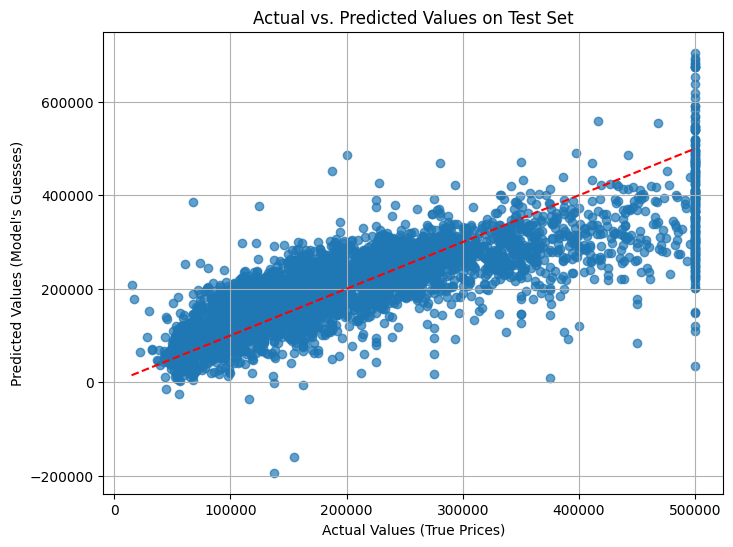

In [50]:
# Plot te Predicted vs Actual Values
# Create a new blank plot
plt.figure(figsize=(8, 6))

# Plot your actual values (on the x-axis) against your predicted values (on the y-axis)
# 'alpha' makes points slightly transparent if they overlap
plt.scatter(y_test, y_pred, alpha=0.7)

# Draw a dashed red line from the smallest value to the largest value.
# This line shows where perfectly predicted points would fall (actual = predicted).
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Label the axes so we know what they represent
plt.xlabel("Actual Values (True Prices)")
plt.ylabel("Predicted Values (Model's Guesses)")

# Give your plot a clear title
plt.title("Actual vs. Predicted Values on Test Set")

# Add a grid to make it easier to read the values
plt.grid(True)

# Show the plot on your screen
plt.show()

In [52]:
from sklearn.metrics import r2_score
# To calculate the R-squared
r2_val = r2_score(y_test, y_pred)

print("\n--- Comment on Model Performance ---")
print("Looking at the 'Actual vs. Predicted Values' plot:")
print("- If the scatter points (blue dots) are **very close to the red dashed line**, it means your model is making good predictions.")
print("- If the points are **spread far away from the red dashed line**, it means your model's predictions are not very accurate.")
print("- A good model will have its points clustered tightly along the red line.")
print(f"\nYour model's R-squared score is approximately {r2_val:.2f}. An R-squared value closer to 1.0 means the model explains more of the variation in prices, indicating better performance.")
print("The plot helps confirm this: a tight cluster along the red line would visually match a high R-squared score. More spread indicates a lower R-squared.")


--- Comment on Model Performance ---
Looking at the 'Actual vs. Predicted Values' plot:
- If the scatter points (blue dots) are **very close to the red dashed line**, it means your model is making good predictions.
- If the points are **spread far away from the red dashed line**, it means your model's predictions are not very accurate.
- A good model will have its points clustered tightly along the red line.

Your model's R-squared score is approximately 0.63. An R-squared value closer to 1.0 means the model explains more of the variation in prices, indicating better performance.
The plot helps confirm this: a tight cluster along the red line would visually match a high R-squared score. More spread indicates a lower R-squared.


In [53]:
# Improve your model by:
# Selecting the top correlated features.
# Applying normalization or standardization.
# Re-training the model and comparing performance.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# For standardization
from sklearn.preprocessing import StandardScaler
# To fill in missing values
from sklearn.impute import SimpleImputer


df = pd.read_csv('housing.csv')

target_variable = 'median_house_value'

# Handle missing values in 'total_bedrooms' for the initial model (simple approach)
# Filling missing 'total_bedrooms' with the average value
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

# Separate features (X) and target (y) for the initial model
X_initial = df.drop(columns=[target_variable, 'ocean_proximity'])
y_initial = df[target_variable]

# Split data for the initial model
X_train_initial, X_test_initial, y_train_initial, y_test_initial = train_test_split(
    X_initial, y_initial, test_size=0.2, random_state=42
)

# Train the initial model
model_initial = LinearRegression()
model_initial.fit(X_train_initial, y_train_initial)

# Make predictions and get initial metrics
y_pred_initial = model_initial.predict(X_test_initial)
r2_initial = r2_score(y_test_initial, y_pred_initial)
mae_initial = mean_absolute_error(y_test_initial, y_pred_initial)
mse_initial = mean_squared_error(y_test_initial, y_pred_initial)
rmse_initial = np.sqrt(mse_initial)

print("--- Initial Model Performance (using all numerical features) ---")
print(f"R-squared (R²): {r2_initial:.2f}")
print(f"Mean Absolute Error (MAE): {mae_initial:.2f}")
print(f"Mean Squared Error (MSE): {mse_initial:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_initial:.2f}")

--- Initial Model Performance (using all numerical features) ---
R-squared (R²): 0.61
Mean Absolute Error (MAE): 51835.73
Mean Squared Error (MSE): 5052953703.90
Root Mean Squared Error (RMSE): 71084.13


<ipython-input-53-e7e12826e56c>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


In [54]:
# Select Top Correlated Features and Apply Standardization
print("\n--- Model Improvement: Selecting Top Correlated Features and Standardizing ---")

# Fill missing values in 'total_bedrooms' again
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

# Calculate correlations with the target variable, considering only numerical features
# Excluding the 'ocean_proximity' to simplify
# Getting only numerical columns
numerical_df = df.select_dtypes(include=np.number)
correlations = numerical_df.corr()[target_variable].sort_values(ascending=False)

# Get the names of the top 5 numerical features that are most correlated
# We drop the target variable itself from this list
top_5_features = correlations.drop(target_variable).index.tolist()[:5]
print(f"\nTop 5 most correlated features selected: {top_5_features}")

# Create a new DataFrame with only these top 5 features
X_improved = df[top_5_features]
y_improved = df[target_variable]

# Split the data using only these selected features
X_train_improved, X_test_improved, y_train_improved, y_test_improved = train_test_split(
    X_improved, y_improved, test_size=0.2, random_state=42
)

# Apply Standardization to the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_improved)
X_test_scaled = scaler.transform(X_test_improved)

# Convert scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=top_5_features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=top_5_features)

print("\nFeatures selected and standardized for the improved model.")


--- Model Improvement: Selecting Top Correlated Features and Standardizing ---

Top 5 most correlated features selected: ['median_income', 'total_rooms', 'housing_median_age', 'households', 'total_bedrooms']

Features selected and standardized for the improved model.


<ipython-input-54-a4c3bbc6ab9b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)



--- Training and Evaluating Improved Model ---

Improved Model R-squared (R²): 0.52
Improved Model MAE: 58372.82
Improved Model MSE: 6333382306.57
Improved Model RMSE: 79582.55


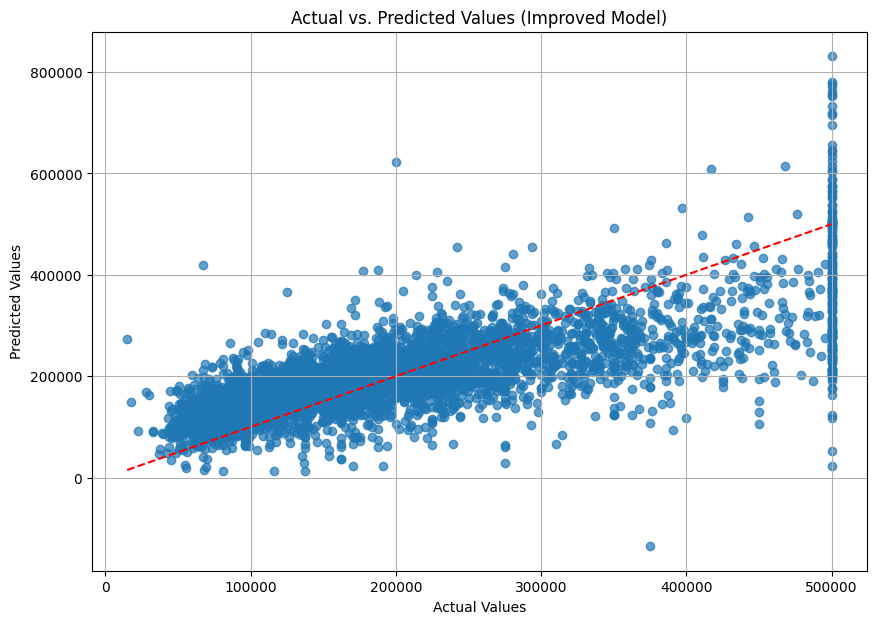


--- Model Performance Comparison ---
Initial Model R-squared (R²): 0.61
Improved Model R-squared (R²): 0.52

Initial Model MAE: 51835.73
Improved Model MAE: 58372.82

Initial Model MSE: 5052953703.90
Improved Model MSE: 6333382306.57

Initial Model RMSE: 71084.13
Improved Model RMSE: 79582.55

--- Conclusion on Model Improvement ---
The improved model (R²=0.52) performs similarly or slightly worse than the initial model (R²=0.61).
This means selecting only the top 5 features might have simplified the model too much, or the dropped features were also important.
The MAE has changed from 51835.73 to 58372.82.
Remember, a higher R-squared and lower MAE/MSE/RMSE usually mean a better model.


In [55]:
#Re-train the Model and Evaluate Performance
print("\n--- Training and Evaluating Improved Model ---")

# Re-train the Linear Regression model with the scaled, top 5 features
model_improved = LinearRegression()
model_improved.fit(X_train_scaled, y_train_improved)

# Make predictions using the improved model on the scaled test data
y_pred_improved = model_improved.predict(X_test_scaled)

# Calculate performance metrics for the improved model
r2_improved = r2_score(y_test_improved, y_pred_improved)
mae_improved = mean_absolute_error(y_test_improved, y_pred_improved)
mse_improved = mean_squared_error(y_test_improved, y_pred_improved)
rmse_improved = np.sqrt(mse_improved)

print(f"\nImproved Model R-squared (R²): {r2_improved:.2f}")
print(f"Improved Model MAE: {mae_improved:.2f}")
print(f"Improved Model MSE: {mse_improved:.2f}")
print(f"Improved Model RMSE: {rmse_improved:.2f}")

# Plot predicted vs. actual values for the improved model
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(y_test_improved, y_pred_improved, alpha=0.7)
plt.plot([y_test_improved.min(), y_test_improved.max()], [y_test_improved.min(), y_test_improved.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Improved Model)")
plt.grid(True)
plt.show()

# --- Compare Performances ---
print("\n--- Model Performance Comparison ---")
print(f"Initial Model R-squared (R²): {r2_initial:.2f}")
print(f"Improved Model R-squared (R²): {r2_improved:.2f}")

print(f"\nInitial Model MAE: {mae_initial:.2f}")
print(f"Improved Model MAE: {mae_improved:.2f}")

print(f"\nInitial Model MSE: {mse_initial:.2f}")
print(f"Improved Model MSE: {mse_improved:.2f}")

print(f"\nInitial Model RMSE: {rmse_initial:.2f}")
print(f"Improved Model RMSE: {rmse_improved:.2f}")

print("\n--- Conclusion on Model Improvement ---")
if r2_improved > r2_initial:
    print(f"The improved model (R²={r2_improved:.2f}) performs better than the initial model (R²={r2_initial:.2f}).")
    print("It explains more of the variation in housing values.")
else:
    print(f"The improved model (R²={r2_improved:.2f}) performs similarly or slightly worse than the initial model (R²={r2_initial:.2f}).")
    print("This means selecting only the top 5 features might have simplified the model too much, or the dropped features were also important.")

if mae_improved < mae_initial:
    print(f"Also, the MAE has decreased from {mae_initial:.2f} to {mae_improved:.2f}, indicating smaller average prediction errors.")
else:
    print(f"The MAE has changed from {mae_initial:.2f} to {mae_improved:.2f}.")

print("Remember, a higher R-squared and lower MAE/MSE/RMSE usually mean a better model.")